In [139]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [140]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

In [145]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [164]:
dataset = pd.read_csv('./data/test.csv')
dataset.head()

label = dataset['label']
vars = dataset.iloc[:,1:7]
X_train, X_test, Y_train, Y_test = train_test_split( vars, label, test_size=0.3, shuffle=False)
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape )

(2513, 6) (1077, 6) (2513,) (1077,)


In [165]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)

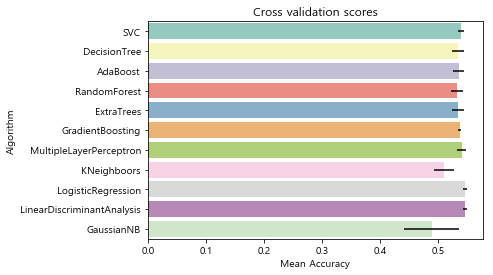

In [166]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'GaussianNB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

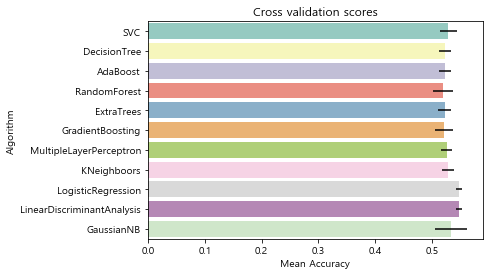

In [161]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'GaussianNB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [152]:
print( cv_means )

[0.5395985909910577, 0.5344223200990731, 0.5352169168412264, 0.5380103468457501, 0.5344223200990731, 0.5376064031016804, 0.5407942834602837, 0.5101633859884209, 0.5459639089792755, 0.5459639089792755, 0.4886902871703005]


0.5468895078922934


<Figure size 2880x2160 with 0 Axes>

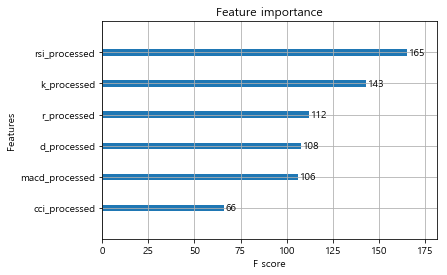

In [138]:
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost

model = XGBClassifier()
model.fit(X_train,Y_train)
plt.figure(figsize=(40,30))
plot_importance(model)
# plt.show()
a = model.predict(X_test)
print(metrics.accuracy_score(a,Y_test))

** Random Forest **

In [167]:
clf = RandomForestClassifier( random_state=42, n_estimators= 500, max_depth=4, criterion='entropy')
clf.fit( X_train, Y_train )
pre = clf.predict(X_test)
acScore = metrics.accuracy_score( Y_test, pre )
accon = metrics.confusion_matrix( Y_test, pre )
print('max_depth:',i, ' max_features:',k,acScore,'\n',accon)

max_depth: 13  max_features: 5 0.5766016713091922 
 [[581  45]
 [411  40]]


In [31]:
print( metrics.classification_report(Y_test, pre))

              precision    recall  f1-score   support

          -1       0.89      0.76      0.82       753
           1       0.58      0.79      0.67       324

   micro avg       0.77      0.77      0.77      1077
   macro avg       0.74      0.77      0.75      1077
weighted avg       0.80      0.77      0.78      1077



In [25]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('LR',LogisticRegression(C=0.05)),
                                              ('RFor',RandomForestClassifier(n_estimators=2000,random_state=0)),
                                              ('ExtC',MLPClassifier()),
                                              ('LDA', LinearDiscriminantAnalysis()),
                                              ('GBC',GradientBoostingClassifier())
                                             ], 
                       voting='soft').fit(X_train,Y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,Y_test))
cross=cross_val_score(ensemble_lin_rbf,X_train,Y_train, cv = 10 ,scoring = "accuracy")
print('The cross validated score is',cross.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy for ensembled model is: 0.7734447539461468


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The cross validated score is 0.7724112565610574


** GridSeachcv **

In [70]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {'n_estimators': [500, 1000],
                 'max_features': [2,3,4,5,],
                 'max_depth' : [4,5,6,7,8,9,10],
                 'criterion' :['gini', 'entropy']}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
print(RFC_best,gsRFC.best_score_)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 336 out of 336 | elapsed:  2.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.7775567051333068


In [116]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=6, criterion='gini')

In [117]:
rfc1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [118]:
pred=rfc1.predict(X_test)

In [119]:
print("Accuracy for Random Forest on CV data: ", metrics.accuracy_score(Y_test,pred))

Accuracy for Random Forest on CV data:  0.7520891364902507


In [107]:
CV_rfc.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
pred=CV_rfc.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ", metrics.accuracy_score(Y_test,pred))